In [1]:
import tensorflow as tf
import os
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
from utils.tensorflow_fashion_mnist_model import train_model, get_predictions
from utils.tensorflow_codeinjection import MaliciousModule

# Saving Model

In [3]:
model_directory = "TensorFlowModels"
if not os.path.isdir(model_directory):
    os.mkdir(model_directory)


safe_model_path = os.path.join(model_directory, "safe_model")
model = train_model()
model.save(safe_model_path)


Epoch 1/10
1875/1875 [==============================] - 2s 775us/step - loss: 0.5044 - accuracy: 0.8235
Epoch 2/10
1875/1875 [==============================] - 1s 732us/step - loss: 0.3764 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 1s 747us/step - loss: 0.3393 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 1s 734us/step - loss: 0.3166 - accuracy: 0.8835
Epoch 5/10
1875/1875 [==============================] - 1s 750us/step - loss: 0.2966 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 1s 748us/step - loss: 0.2829 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 1s 754us/step - loss: 0.2700 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 1s 741us/step - loss: 0.2587 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 1s 745us/step - loss: 0.2508 - accuracy: 0.9076
Epoch 10/10
313/313 [==============================] - 0s 470us/

# Prediction using Safe Model

1/1 [==============================] - 0s 35ms/step

The model predicts: ['Ankle boot', 'Pullover', 'Trouser'] with probabilities: [ 99.883  99.92  100.   ]

The true labels are ['Ankle boot', 'Pullover', 'Trouser']


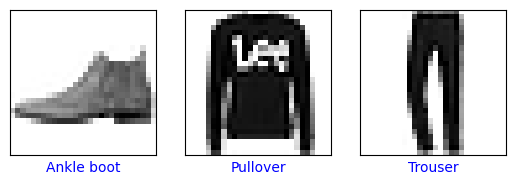

In [4]:
number_of_predictions = 3
get_predictions(model, number_of_predictions)

# Scan the Safe Model 

In [5]:
!modelscan -p ./TensorFlowModels/safe_model

Scanning /Users/mehrinkiani/Documents/modelscan/examples/TensorFlowModels/safe_model/fingerprint.pb using saved_model model scan
Scanning /Users/mehrinkiani/Documents/modelscan/examples/TensorFlowModels/safe_model/keras_metadata.pb using saved_model model scan
Scanning /Users/mehrinkiani/Documents/modelscan/examples/TensorFlowModels/safe_model/saved_model.pb using saved_model model scan

--- Summary ---

 No issues found! 🎉


# Code Injection Attack

In [6]:
unsafe_model = MaliciousModule(model)
unsafe_model.build(input_shape=(None, 28,28))

# Save the unsafe model
unsafe_model_path = os.path.join(model_directory, "unsafe_model")
unsafe_model.save(unsafe_model_path)

# Model Prediction

File found: /tmp/aws_secret.txt
aws_access_key_id=<access_key_id>
aws_secret_access_key=<aws_secret_key>
1/1 [==============================] - 0s 45ms/step

The model predicts: ['Ankle boot', 'Pullover', 'Trouser'] with probabilities: [ 99.883  99.92  100.   ]

The true labels are ['Ankle boot', 'Pullover', 'Trouser']


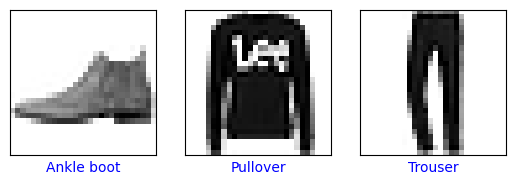

In [7]:
unsafe_model_loaded = tf.keras.models.load_model(unsafe_model_path)

number_of_predictions = 3
get_predictions(unsafe_model_loaded, number_of_predictions)

# Scan the Unsafe Model

In [8]:
!modelscan -p TensorFlowModels/unsafe_model

Scanning /Users/mehrinkiani/Documents/modelscan/examples/TensorFlowModels/unsafe_model/fingerprint.pb using saved_model model scan
Scanning /Users/mehrinkiani/Documents/modelscan/examples/TensorFlowModels/unsafe_model/keras_metadata.pb using saved_model model scan
Scanning /Users/mehrinkiani/Documents/modelscan/examples/TensorFlowModels/unsafe_model/saved_model.pb using saved_model model scan

--- Summary ---

Total Issues: 2

Total Issues By Severity:

    - LOW: 0
    - MEDIUM: 0
    - HIGH: 2
    - CRITICAL: 0

--- Issues by Severity ---

--- HIGH ---

Unsafe operator found:
  - Severity: HIGH
  - Description: Use of unsafe operator 'ReadFile' from module 'Tensorflow'
  - Source: /Users/mehrinkiani/Documents/modelscan/examples/TensorFlowModels/unsafe_model/saved_model.pb

Unsafe operator found:
  - Severity: HIGH
  - Description: Use of unsafe operator 'WriteFile' from module 'Tensorflow'
  - Source: /Users/mehrinkiani/Documents/modelscan/examples/TensorFlowModels/unsafe_model/saved